(content:code-outputs:glue)=
# 存储代码输出并插入到内容中

您经常希望在一个笔记本中运行分析，并将它们插入到文档的其他地方。例如，如果你想包含一个图，或者如果你想引用你做过的一个分析。

```{margin}
目前，`glue` 只适用于 Python。
```
来自 [MyST-NB](https://myst-nb.readthedocs.io/) 的 `glue` 工具允许你在笔记本中添加一个键到变量中，然后通过引用该键在你的书中显示这些变量。它遵循两个步骤：

* **将变量绑定（glue）到名称（name）上**。通过在您想在书中其他地方重用的变量上使用 `myst_nb.glue` 函数来实现这一点。您将为该变量指定一个日后可以引用的名称。
* **从页面内容中引用该变量**。然后，在编写内容时，使用 `{glue:}` 角色将变量插入到文本中。

我们将在下面更详细地介绍每个步骤。

```{margin}
有关角色的更多信息，请参阅 [](../myst.md)。
```

(glue/gluing)=
## 把变量 glue 在你的笔记本上

您可以使用 `myst_nb.glue()` 将变量的值赋给您选择的键。`glue` 将存储通常用于显示该变量的所有信息（例如，通过将变量放在代码单元格的末尾来显示该变量时发生的任何事情）。选择一个您将记住的键，因为您将在以后使用它。

下面的代码将一个变量绑定在笔记本的 `"cool_text"` 键上：

In [1]:
from myst_nb import glue
my_variable = "here is some text!"
glue("cool_text", my_variable)

'here is some text!'

然后可以将其插入到文本中。在内容中添加 `` {glue:}`cool_text` ``，结果如下：{glue:}`cool_text`。

### 将数字、图和表绑定起来

你可以把任何东西绑定在笔记本上，然后用 `{glue:}` 显示出来。这里我们将展示如何绑定**数字和图像**。我们将模拟一些数据并在其上运行一个简单的引导程序。我们将隐藏此过程大部分代码，以集中在绑定部分。

In [2]:
# Simulate some data and bootstrap the mean of the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n_points = 10000
n_boots = 1000
mean, sd = (3, .2)
data = sd*np.random.randn(n_points) + mean
bootstrap_indices = np.random.randint(0, n_points, n_points*n_boots).reshape((n_boots, n_points))

在下面的单元格中，`data` 包含我们的数据，`bootstrap_indices` 是每个引导程序中的示例索引的集合。下面我们将计算一些感兴趣的统计数据，并将它们 **`glue()`** 在笔记本上。

In [3]:
# Calculate the mean of a bunch of random samples
means = data[bootstrap_indices].mean(0)
# Calculate the 95% confidence interval for the mean
clo, chi = np.percentile(means, [2.5, 97.5])

# Store the values in our notebook
glue("boot_mean", means.mean())
glue("boot_clo", clo)
glue("boot_chi", chi)

2.998269248690492

2.986024906653744

3.0105870884933004

默认情况下，`glue` 将显示您正在绑定的变量的值。这对于 sanity-checking 其值的完整性很有用。如果您想**阻止显示**，请使用 `display=False` 选项。注意下面，我们也覆盖了 `boot_chi` 的值（但使用了相同的值）：

In [4]:
glue("boot_chi_notdisplayed", chi, display=False)

3.0105870884933004

你也可以绑定可视化，比如 Matplotlib 图形（这里我们使用 `display=False` 来确保图形不会绘制两次）：

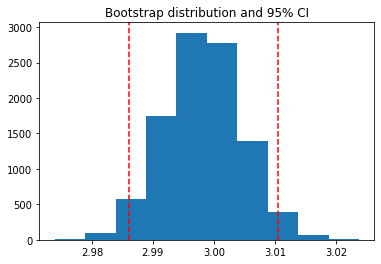

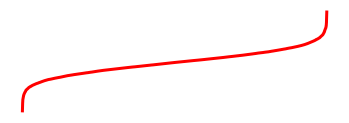

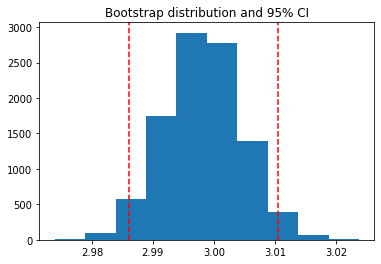

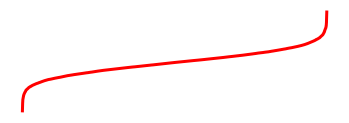

In [5]:
# Visualize the historgram with the intervals
fig, ax = plt.subplots()
ax.hist(means)
for ln in [clo, chi]:
    ax.axvline(ln, ls='--', c='r')
ax.set_title("Bootstrap distribution and 95% CI")

# And a wider figure to show a timeseries
fig2, ax = plt.subplots(figsize=(6, 2))
ax.plot(np.sort(means), lw=3, c='r')
ax.set_axis_off()

glue("boot_fig", fig, display=False)
glue("sorted_means_fig", fig2, display=False)

对于 `DataFrames`（或其他类似表的对象）也可以这样做。

In [6]:
bootstrap_subsets = data[bootstrap_indices][:3, :5].T
df = pd.DataFrame(bootstrap_subsets, columns=["first", "second", "third"])
glue("df_tbl", df)

,first,second,third
0,3.236786,2.663274,3.313494
1,2.874729,2.888184,2.906788
2,2.886826,3.070225,2.985214
3,2.901106,3.195858,2.706086
4,3.223310,2.583306,3.036628


```{tip}
由于我们将在稍后将此图粘贴到我们的文档中，您可能希望在这里删除输出，使用 `remove-output` 标记（参见 {ref}`hiding/remove-content`）。
```

(glue/pasting)=

### 将绑定的变量粘贴到页面中

一旦你把变量绑定到它们的名字上，你就可以把这些变量粘贴到你的书的任何地方（甚至在其他页面上）。这些变量可以使用 `glue` 家族中的角色或指令之一进行**粘贴**。

### `glue` 角色/指令

最简单的角色和指令是 `glue:any`，它将被粘合的输出分别内联粘贴或作为一个块，不需要其他格式。简单的添加：

````
```{glue:} your-key
```
````

例如，我们将使用以下文本粘贴上面生成的 plot：

````md
```{glue:} boot_fig
```
````

它看起来是这样的：

```{glue:} boot_fig
```

或者我们可以像这样粘贴作为内联对象：

```md
In-line text; {glue:}`boot_mean`, and a figure: {glue:}`boot_fig`.
```

In-line text; {glue:}`boot_mean`, and a figure: {glue:}`boot_fig`.

```{tip}
我们建议在绘制内联图时使用更宽、更短的图形，其比值约为 6x2。例如，这是一个从引导程序中排序的方法的内联图：{glue:}`sorted_means_fig`。它可以用来做一个不太复杂的视觉点！想了解更多，请查看[火花线是如何使用的](https://en.wikipedia.org/wiki/Sparkline)。
```

接下来，我们将介绍一些更具体的粘贴功能，它可以让您更好地控制粘贴后的输出在页面中的外观。

## 控制粘贴的输出

您可以使用子命令 `{glue:}` 来控制粘贴的输出。这些可以这样使用：`` {glue:subcommand}`key` ``。这些子命令允许您控制粘贴输出的更多外观、感觉和内容。

```{tip}
当你使用 `{glue:}` 时，你实际上是在使用 `{glue:any}` 的简写。这是一个通用的命令，它不会对你要粘的东西做很多假设。
```

### `glue:text` 角色

`glue:text` 角色特定于文本输出。例如，以下文字:

```md
The mean of the bootstrapped distribution was {glue:text}`boot_mean` (95% confidence interval {glue:text}`boot_clo`/{glue:text}`boot_chi`).
```

呈现的是：

The mean of the bootstrapped distribution was {glue:text}`boot_mean` (95% confidence interval {glue:text}`boot_clo`/{glue:text}`boot_chi`)

```{note}
`glue:text` 仅适用于包含 `text/plain` 输出的 glue 变量。
```

使用 `glue:text`，我们可以为**输出添加格式**。如果您要显示数字并希望将结果四舍五入，这尤其有用。要添加格式，请使用以下语法：

* `` {glue:text}`mykey:formatstring` ``

例如，``My rounded mean: {glue:text}`boot_mean:.2f` `` 将被渲染为： My rounded mean: {glue:text}`boot_mean:.2f` (95% CI: {glue:text}`boot_clo:.2f`/{glue:text}`boot_chi:.2f`)。

### `glue:figure` 指令

使用 `glue:figure`，你可以对类似于 figure 的对象应用更多的格式，比如给它们一个标题和可参考的标签。例如，

````md
```{glue:figure} boot_fig
:figwidth: 300px
:name: "fig-boot"

This is a **caption**, with an embedded `{glue:text}` element: {glue:text}`boot_mean:.2f`!
```
````

生成如下图：

```{glue:figure} boot_fig
:figwidth: 300px
:name: "fig-boot"

This is a **caption**, with an embedded `{glue:text}` element: {glue:text}`boot_mean:.2f`!
```

后来,代码

```md
Here is a {ref}`reference to the figure <fig-boot>`
```

可用于引用图。

Here is a {ref}`reference to the figure <fig-boot>`

这里有一个表：

````md
```{glue:figure} df_tbl
:figwidth: 300px
:name: "tbl:df"

A caption for a pandas table.
```

````

被渲染成

```{glue:figure} df_tbl
:figwidth: 300px
:name: "tbl:df"

A caption for a pandas table.
```

### `glue:math` 指令

`glue:math` 指令特定于 LaTeX 数学输出（包含 `text/latex` MIME 类型的粘合变量），其工作原理类似于 [Sphinx math 指令](https://www.sphinx-doc.org/en/1.8/usage/restructuredtext/directives.html#math)。例如，我们用这段代码粘合一个等式：

In [7]:
import sympy as sym
f = sym.Function('f')
y = sym.Function('y')
n = sym.symbols(r'\alpha')
f = y(n)-2*y(n-1/sym.pi)-5*y(n-2)
glue("sym_eq", sym.rsolve(f,y(n),[1,4]))

(sqrt(5)*I)**\alpha*(1/2 - 2*sqrt(5)*I/5) + (-sqrt(5)*I)**\alpha*(1/2 + 2*sqrt(5)*I/5)

现在我们可以使用以下代码：

````md
```{glue:math} sym_eq
:label: eq-sym
```
````

在这里插入方程：

```{glue:math} sym_eq
:label: eq-sym
```

% TODO: figure out why this isn't working
% Which we then reference as Equation {eq}`eq-sym`.

```{note}
`glue:math` 仅适用于包含 `text/latex`  输出的粘合变量。
```

## 高级 `glue` 用例

下面是 `glue` 子模块的一些更具体、更高级的用法。

### 粘贴到表

除了粘贴输出块或内联文本外，还可以直接粘贴到表中。这允许您使用在其他单元格或其他笔记本中生成的输出来组成结构化数据的复杂集合。例如，下面的 Markdown 表：

````md
| name                            |       plot                    | mean                      | ci                                                |
|:-------------------------------:|:-----------------------------:|---------------------------|---------------------------------------------------|
| histogram and raw text          | {glue:}`boot_fig`             | {glue:}`boot_mean`          | {glue:}`boot_clo`-{glue:}`boot_chi`                   |
| sorted means and formatted text | {glue:}`sorted_means_fig`     | {glue:text}`boot_mean:.3f` | {glue:text}`boot_clo:.3f`-{glue:text}`boot_chi:.3f` |
````

结果：

| name                            |       plot                  | mean                      | ci                                                |
|:-------------------------------:|:---------------------------:|---------------------------|---------------------------------------------------|
| histogram and raw text          | {glue:}`boot_fig`             | {glue:}`boot_mean`          | {glue:}`boot_clo`-{glue:}`boot_chi`                   |
| sorted means and formatted text | {glue:}`sorted_means_fig`     | {glue:text}`boot_mean:.3f` | {glue:text}`boot_clo:.3f`-{glue:text}`boot_chi:.3f` |